<a href="https://colab.research.google.com/github/kshitijkamdi/c-programming/blob/main/Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
#loading the csv dato to Panda's Dataframe
gold_data= pd.read_csv('/content/gld_price_data.csv')

In [3]:
#print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [6]:
# getting some basic informarion about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [8]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [15]:
import pandas as pd

# Assuming 'Date' is the column with date strings
gold_data['Date'] = pd.to_datetime(gold_data['Date'])  # Convert 'Date' column to datetime objects

# Extract numerical features for correlation calculation
numerical_features = gold_data.select_dtypes(include=['number'])

# Calculate correlation on numerical features only
correlation = numerical_features.corr()

<Axes: >

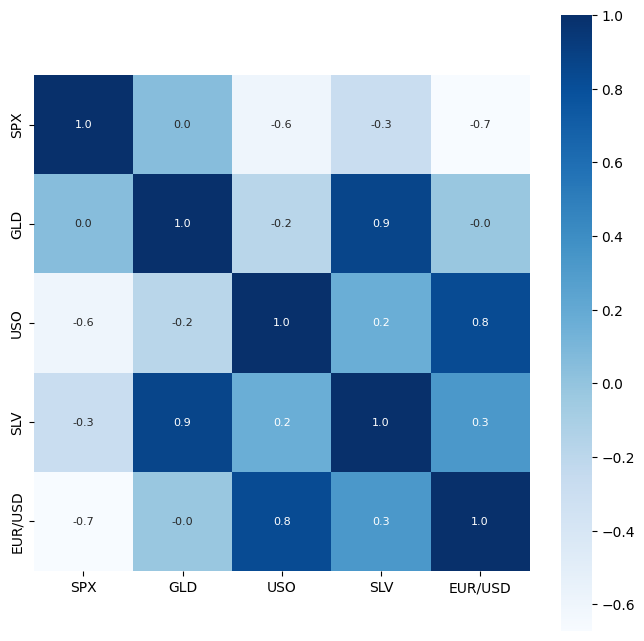

In [17]:
# constructing a heatmap to understand the correaltion
plt.figure(figsize= (8,8))
sns.heatmap(correlation, cbar=True, square=True,  fmt='.1f', annot= True, annot_kws={'size':8}, cmap='Blues')

In [18]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-19-32e1547d4388>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

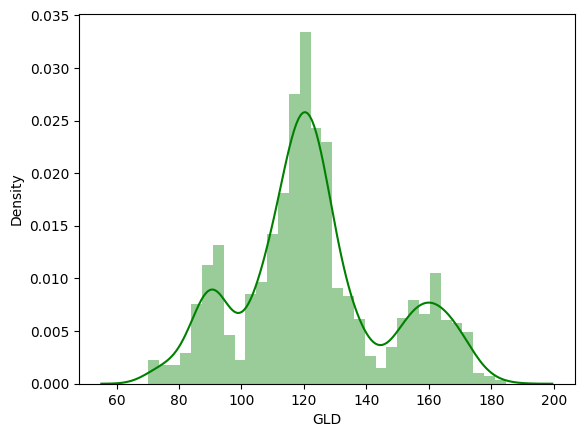

In [19]:
# CHECK THE DISTRIBUTION  of the gold price
sns.distplot(gold_data['GLD'], color='green')

Splitting the features and Target

In [21]:
X= gold_data.drop(['Date','GLD'], axis=1)
Y= gold_data['GLD']

In [22]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [23]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training data and test data

In [24]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=2)

Model Training:
Random Forest Regressor

In [25]:
regressor= RandomForestRegressor(n_estimators=100)

In [26]:
#training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [27]:
#prediction on Test Data
test_data_prediction= regressor.predict(X_test)

In [28]:
print(test_data_prediction)

[168.59279971  82.13049966 116.05270049 127.51730074 120.66460146
 154.58439791 150.66829779 126.07520039 117.44499882 126.01740094
 116.60530098 171.56810105 141.48789876 167.92009843 115.32000013
 117.89860049 139.15700333 170.34360069 160.12190369 158.54429898
 154.95380012 125.27420017 175.21039971 157.16690265 125.27030042
  93.84099946  78.13609985 120.43700038 119.101799   167.39480052
  88.24440019 125.27529978  91.16620064 117.63350027 121.06769903
 135.86620106 115.30500134 115.2624007  146.39619981 107.33890095
 104.61060252  87.11129785 126.5681006  117.98309973 151.17919892
 119.70049999 108.40530022 108.08669856  93.13080035 127.28189708
  74.77190059 113.68879941 121.29320026 111.23669918 118.84869905
 120.93209932 159.66260031 168.53290116 147.1910974   85.74809864
  94.35890022  86.87419872  90.69620011 118.9510005  126.51010069
 127.49459986 169.49709943 122.29799919 117.35199872  98.72220001
 168.29660224 143.30229847 131.47850225 121.11630216 121.30079946
 119.75970

In [31]:
# R squared error
error_score= r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9888747711233605


Compare the actual values and Predicted Valuye in  a Plot

In [32]:
Y_test= list(Y_test)

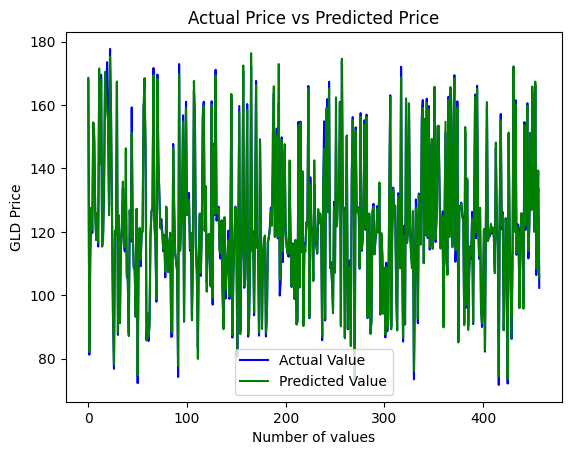

In [33]:
plt.plot(Y_test, color='blue', label= 'Actual Value')
plt.plot(test_data_prediction, color='green', label= 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()